<a href="https://colab.research.google.com/github/FrankAlvaradoR/Teor-a-de-Control/blob/main/Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Curso de señales y sistemas en Python
http://blog.espol.edu.ec/telg1001/lti-ct-laplace-hs-con-fracciones-parciales-y-python/


# Solución de sistemas lineales de ecuaciones

1.1 Procedimiento

Determine la solución al sistema de ecuaciones simultáneas

Defina las ecuaciones
* eq1: 3x1 +4x2 =5;
* eq2: 8x1 +3x2 +5x3 =0;
* eq3: 4x1 +7x3 =9;

In [3]:
# Solución de sistemas lineales de ecuaciones
import sympy as sym
import numpy as np

#Resolver el sistema de ecuacianoes 
A = np.array([[3, 4, 0], [8, 3, 5], [4, 0, 7]])
B = np.array([5, 0, 9])
X2 = np.linalg.solve(A,B)

print(X2)

[-3.51851852  3.88888889  3.2962963 ]


# Tranformada de Laplace
2.1 Procedimiento

En una ventana de comandos se evaluarán las tranformadas de laplace de las siguientes funciones

Se definen las funciones
* f: 2sin(wt)
* g: 3tan(5t)

In [ ]:
# Transforma de Laplace
import sympy as sym
import numpy as np

# INGRESO
t = sym.Symbol('t')
w = sym.Symbol('w')
s = sym.Symbol('s')

# PROCEDIMIENTO
ft = 2 * sym.sin(w*t)
gt = sym.sin(t)/t

print('\n f(t): ')
sym.pprint(ft)
print('\n g(t): ')
sym.pprint(gt)

Fs = sym.laplace_transform(ft,t,s)
Gs = sym.laplace_transform(gt,t,s)

# SALIDA

print('\n F(s): ')
sym.pprint(Fs[0])
print('\n G(s): ')
sym.pprint(Gs[0])


# Transformada inversa de Laplace

3.1 Procedimiento

Evaluar la transformada inversa de los funciones polinomiales

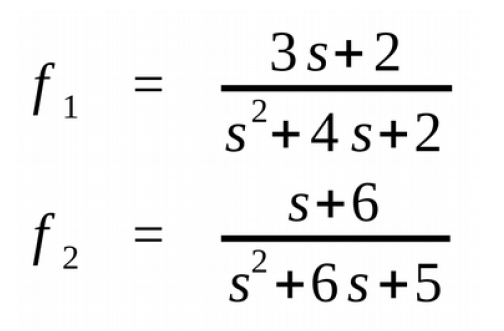

Se definen los polinomios
* f1: (3*s+2) / (s^2+4*s+2);
* f2: (s+6) / (s^2+6*s+5);
​


In [29]:
# Transformada de Laplace con Sympy
import sympy as sym

# INGRESO
s,t = sym.symbols('s t')

Fs = (3*s+2)/(s**2+4*s+2)

# PROCEDIMIENTO
# Transformada Inversa de Laplace
ft = sym.inverse_laplace_transform(Fs,s,t)

# SALIDA
print('\n F(s): ')
sym.pprint(Fs)

print('\n f(t): ')
print(ft)
print('\n \n')
sym.pprint(ft)


 F(s): 
  3⋅s + 2   
────────────
 2          
s  + 4⋅s + 2

 f(t): 
sqrt(2)*(-4*exp(sqrt(2)*t) + 3*sqrt(2)*exp(sqrt(2)*t) + 4*exp(-sqrt(2)*t) + 3*sqrt(2)*exp(-sqrt(2)*t))*exp(-2*t)*Heaviside(t)/4

 

   ⎛     √2⋅t         √2⋅t      -√2⋅t         -√2⋅t⎞  -2⋅t     
√2⋅⎝- 4⋅ℯ     + 3⋅√2⋅ℯ     + 4⋅ℯ      + 3⋅√2⋅ℯ     ⎠⋅ℯ    ⋅θ(t)
───────────────────────────────────────────────────────────────
                               4                               


Por fracciones parciales


In [37]:

# Ps es numerador, Qs es denominador
import sympy as sym

# INGRESO
s = sym.Symbol('s')

Ps = s + 6
Qs = s**2 + 6*s + 5

# PROCEDIMIENTO
P = Ps.as_poly(s)
Q = Qs.as_poly(s)
Q_raiz = sym.roots(Q)

# Respuesta impulso
Hs = P/Q

# fracciones parciales
Hsp = sym.apart(Hs,s)

# transformada inversa de Laplace
t = sym.Symbol('t')
ht = 0*t  # expresión vacia en t
terminos = Hsp.args
for term_s in terminos:
    term_t = sym.inverse_laplace_transform(term_s,s,t)
    ht = ht + term_t

# SALIDA
print('H(s):')
sym.pprint(Hs)
print('\nPara H(s)=P(s)/Q(s) ')
print(' {polos,veces}: ',Q_raiz)
print('\nFracciones parciales:')
sym.pprint(Hsp)

print('\n h(t): ')
sym.pprint(ht)

H(s):
   s + 6    
────────────
 2          
s  + 6⋅s + 5

Para H(s)=P(s)/Q(s) 
 {polos,veces}:  {-1: 1, -5: 1}

Fracciones parciales:
      1           5    
- ───────── + ─────────
  4⋅(s + 5)   4⋅(s + 1)

 h(t): 
   -t         -5⋅t     
5⋅ℯ  ⋅θ(t)   ℯ    ⋅θ(t)
────────── - ──────────
    4            4     


Ejemplo 2.3 Impulso unitario desplazado en tiempo
En el caso de usar desplazamintos en tiempo, se recomienda también usar las expresiones simples, para término a término realizar la transformada, recuerde usar sym.expand(Fs,s) antes de aplicar la tranformada inversa.

$F(s)= \frac{1}{s}e^{-5t}$
 
usando en el algoritmo anterior la expresión de ingreso :

In [ ]:
Fs = (1/s)*sym.exp(-5*s)
# PROCEDIMIENTO
# Transformada Inversa de Laplace
ft = sym.inverse_laplace_transform(Fs,s,t)

# SALIDA
print('\n F(s): ')
sym.pprint(Fs)

print('\n f(t): ')
sym.pprint(ft)

In [2]:
# Fracciones parciales de H(s) con Sympy
# Ps es numerador, Qs es denominador
import sympy as sym

# INGRESO
s = sym.Symbol('s')

Ps = 2*s+4
Qs = s**2 + 4*s + 3

# PROCEDIMIENTO
P = Ps.as_poly(s)
Q = Qs.as_poly(s)
Q_raiz = sym.roots(Q)

# Respuesta impulso
Hs = P/Q

# fracciones parciales
Hsp = sym.apart(Hs,s)

# transformada inversa de Laplace
t = sym.Symbol('t')
ht = 0*t  # expresión vacia en t
terminos = Hsp.args
for term_s in terminos:
    term_t = sym.inverse_laplace_transform(term_s,s,t)
    ht = ht + term_t

# SALIDA
print('H(s):')
sym.pprint(Hs)
print('\nPara H(s)=P(s)/Q(s) ')
print(' {polos,veces}: ',Q_raiz)
print('\nFracciones parciales:')
sym.pprint(Hsp)

print('\n h(t): ')
sym.pprint(ht)

H(s):
  2⋅s + 4   
────────────
 2          
s  + 4⋅s + 3

Para H(s)=P(s)/Q(s) 
 {polos,veces}:  {-1: 1, -3: 1}

Fracciones parciales:
  1       1  
───── + ─────
s + 3   s + 1

 h(t): 
 -t         -3⋅t     
ℯ  ⋅θ(t) + ℯ    ⋅θ(t)
